# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Mini Project: Credit Card Default Risk Analysis

## Learning Objectives

At the end of the mini project, you will be able to

* understand the application of machine learning in finacial sector
* use a real world dataset.
* compare between different types of classification methods and their pros and cons.

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing



### Dataset Description

The dataset chosen for this mini project is [default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) with 30000 instances each having 25 attributes.



In [1]:
# import the libraries used for machine learning
import numpy as np
import pandas as pd
import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
#from pandas_profiling import ProfileReport
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import os

**Exercise 1**: Load the data show the top few rows of the dataframe.  (***1 point***)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cc_default.xls to cc_default.xls


In [3]:
df = pd.read_excel('cc_default.xls')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df = pd.read_excel('cc_default.xls', skiprows=1, index_col=0)
# YOUR CODE HERE
df.head()
df = df.reset_index()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Exercise 2**: Perform the following

- Exploratory Data Analysis (***2 points***)
- Preprocessing (***2 points***)

## Exploratory data analysis

there are total 23 explanatory variables and one response variable. Some variable need to be converted to categories. such as.

* __Gender(X2)__
1 = Male, 2 = Female

* __EDUCATION(X3)__
1 = graduate school; 2 = university; 3 = high school; 4 = others
* __Marital status(X4)__
1 = married; 2 = single; 3 = others
* __Repayment status(X6-X11)__
   -2= no consumption, -1= pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ...,8 = payment delay for eight months,9 = payment delay for nine months and above

   these variables should be converted to categorical variable


In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df['MARRIAGE']

,MARRIAGE
0,1
1,2
2,2
3,1
4,1
...,...
29995,1
29996,2
29997,2
29998,1


In [7]:
# YOUR CODE HERE   # drop column "ID"
df = df.drop('ID', axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Statistics
The detail statistics of the dataset

In [8]:
print("STATISTICS OF NUMERIC COLUMNS")
print()
print(df.describe().T)

STATISTICS OF NUMERIC COLUMNS

                              count           mean            std       min  \
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1            

In [9]:
df.SEX.value_counts() # male, female counts

,count
SEX,
2,18112
1,11888


In [10]:
df.EDUCATION.value_counts() #Education categories

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [11]:
df.MARRIAGE.value_counts() # Marriage catagories

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [12]:
df.PAY_0.describe()

,PAY_0
count,30000.000000
mean,-0.016700
std,1.123802
min,-2.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,8.000000


# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

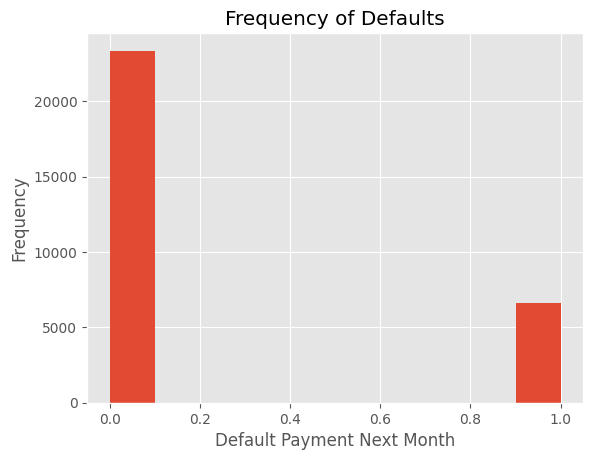

In [13]:
from IPython.core.pylabtools import figsize
# plot the frequency of defaults
plt.hist(df['default payment next month'])
plt.xlabel('Default Payment Next Month')
plt.ylabel('Frequency')
plt.title('Frequency of Defaults')
plt.show

In [14]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Figure size 2000x500 with 0 Axes>

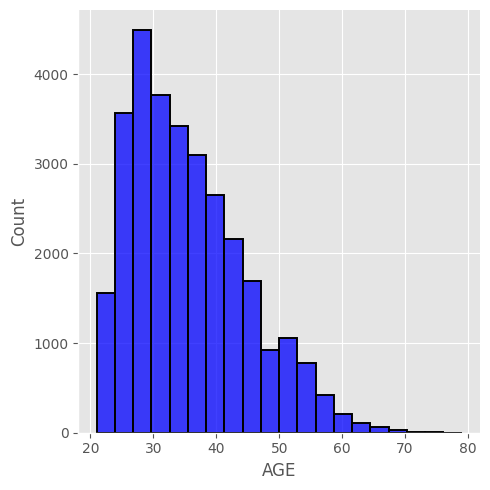

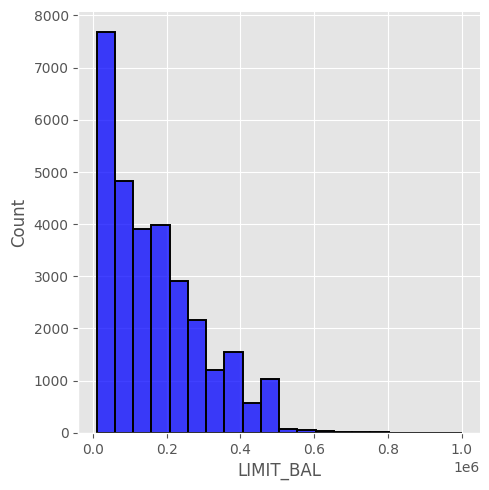

In [27]:
plt.figure(figsize=(20,5))
sns.displot(data=df,x='AGE',bins=20,color='blue',edgecolor='black', lw=4)

sns.displot(data=df,x='LIMIT_BAL',bins=20,color='blue',edgecolor='black', lw=4)

<ipython-input-31-244d52f1a796>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


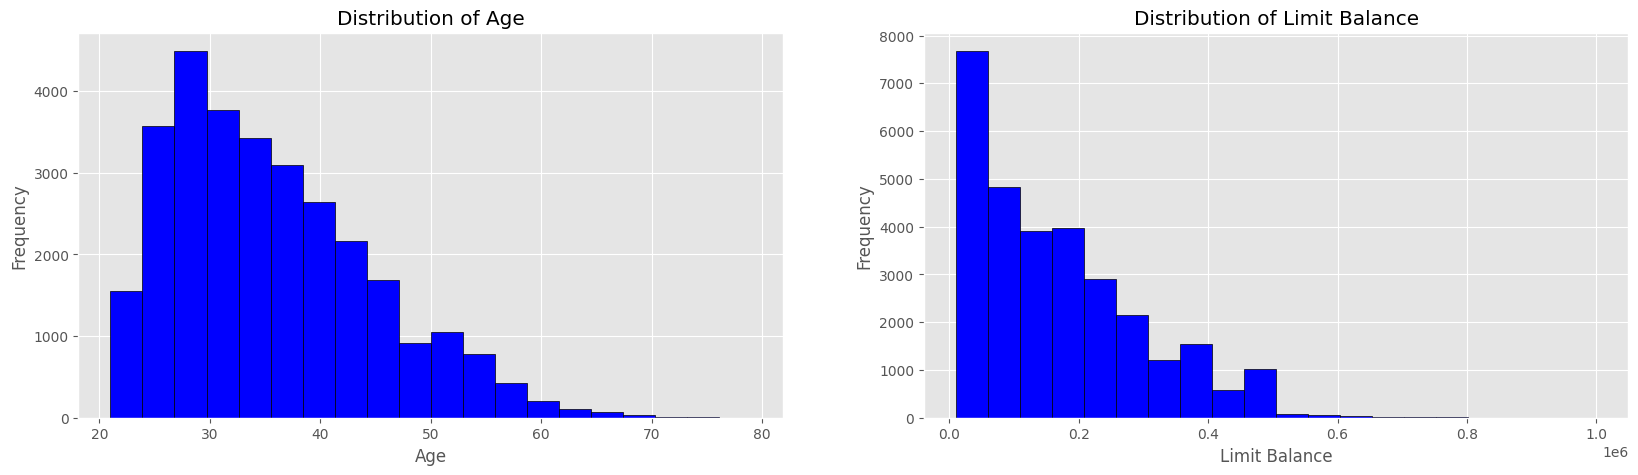

In [31]:
# Plot distribution of age and limit balance
plt.subplots(figsize=(20,5))
plt.subplot(121)
plt.hist(df['AGE'],bins=20,color='blue',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.subplot(122)
plt.hist(df['LIMIT_BAL'],bins=20,color='blue',edgecolor='black')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Limit Balance')
plt.show()


<Axes: xlabel='MARRIAGE', ylabel='AGE'>

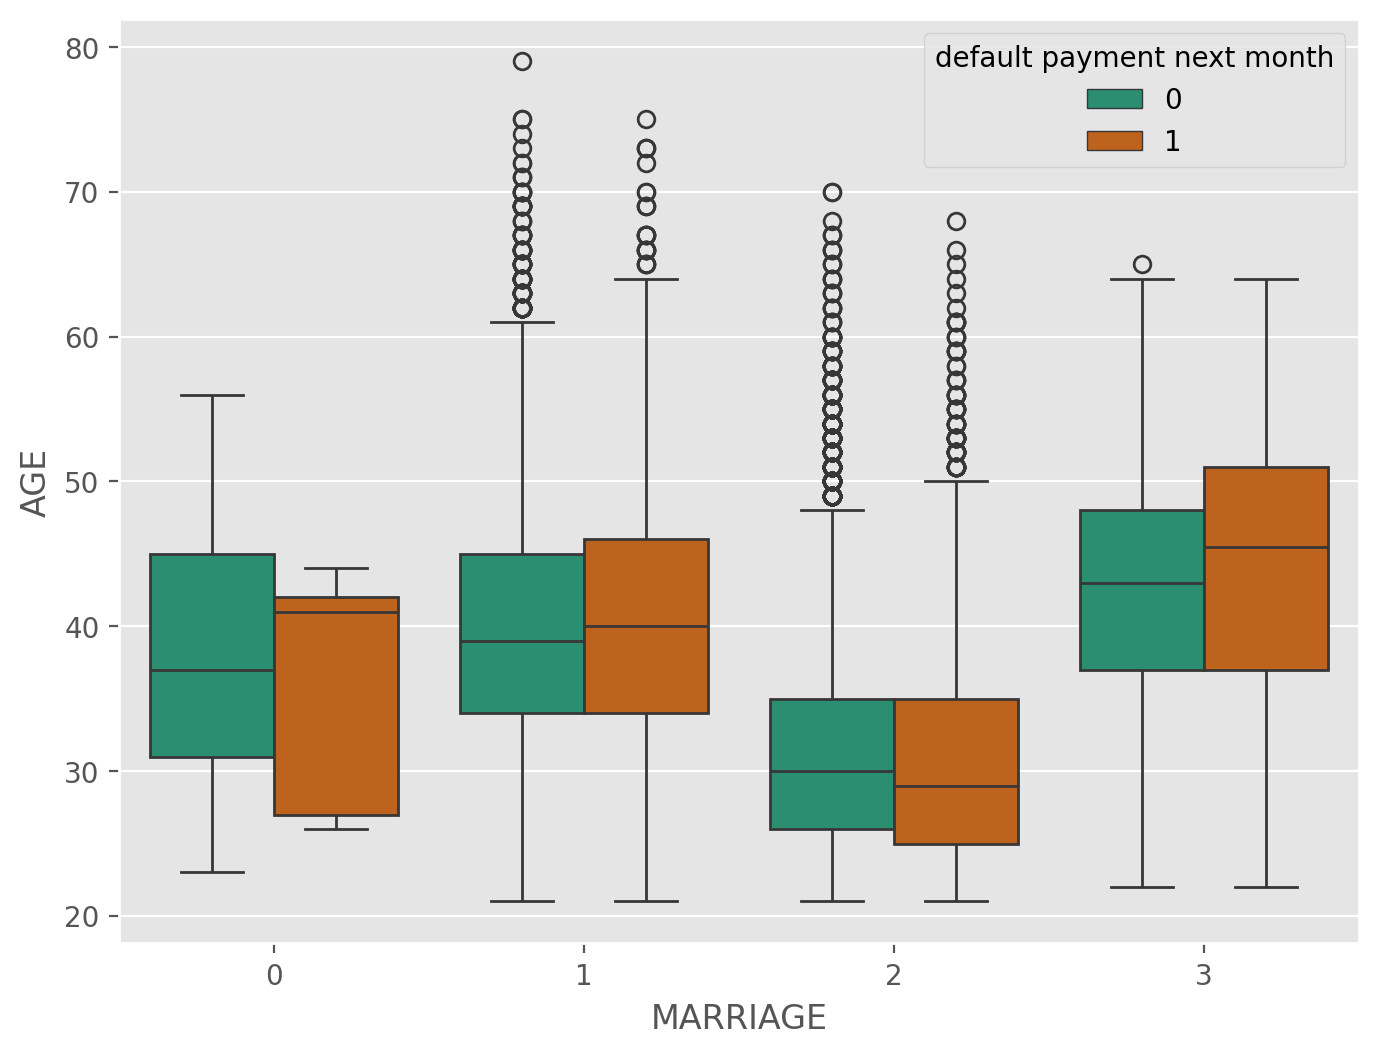

In [32]:
#Plot the defaulter(Y), marriage(X4) vs age(X5) use seborn library

plt.figure(figsize=(8,6),dpi=200)
sns.boxplot(x='MARRIAGE',y='AGE',data=df,hue= 'default payment next month',
               palette='Dark2')


<Axes: xlabel='SEX', ylabel='AGE'>

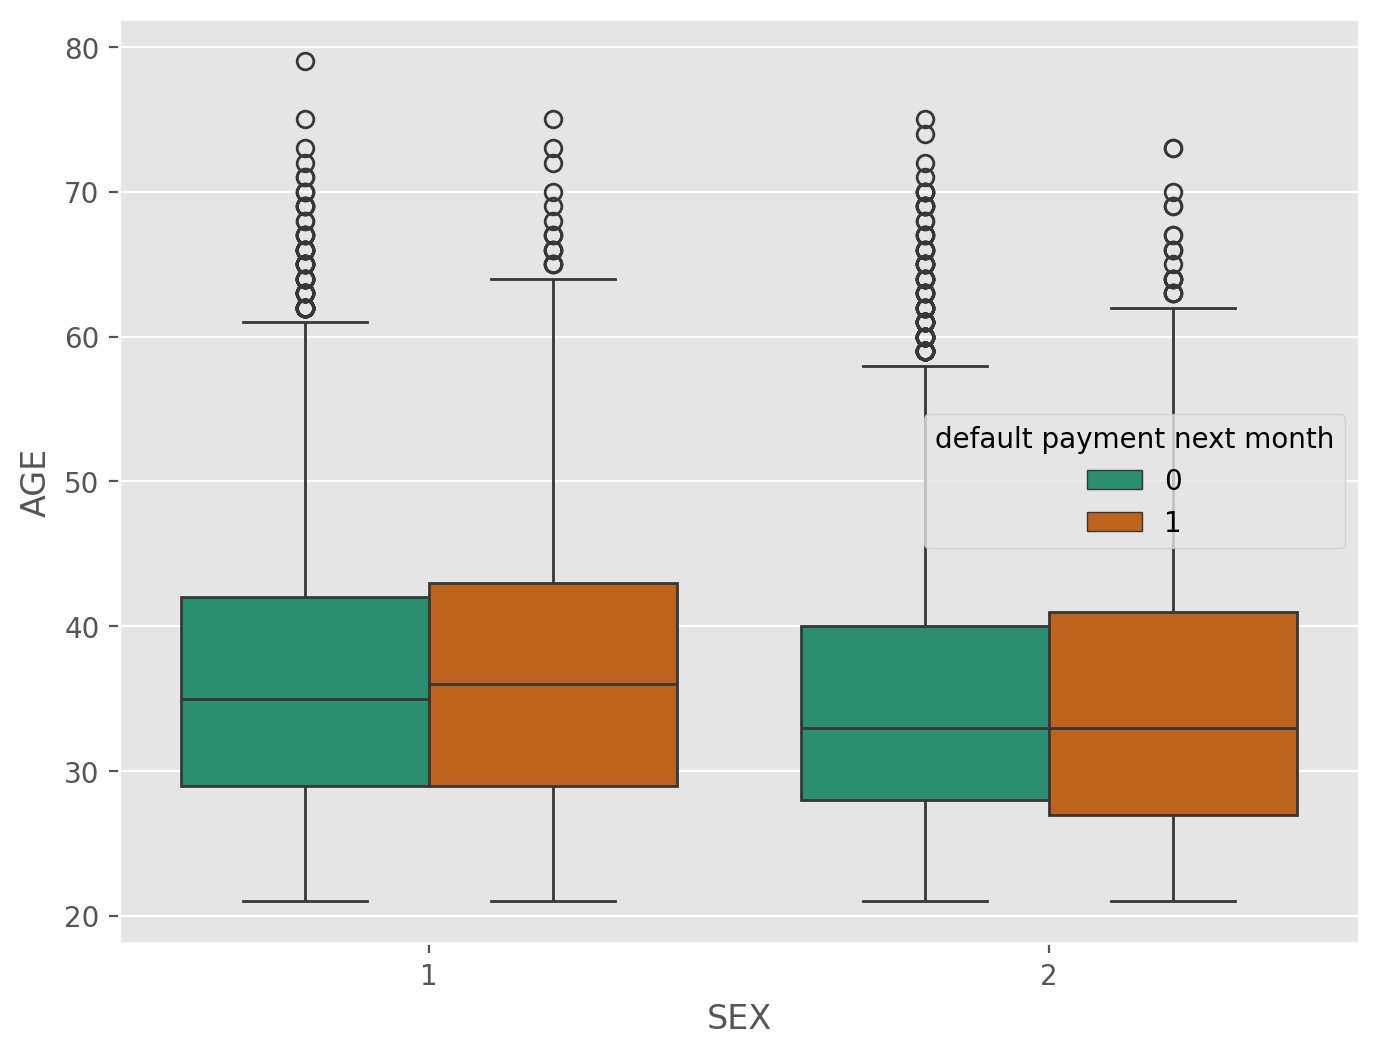

In [33]:
# plot the defaulter(Y), sex(X2) vs age(X5)
plt.figure(figsize=(8,6),dpi=200)
sns.boxplot(x='SEX',y='AGE',data=df,hue= 'default payment next month',
               palette='Dark2')

# Preprocessing

In [ ]:
{'X3': 'EDU'}.items()

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df_encoded = encoder.fit_transform(df) ## Converts the dataframe into Numpy Array. Hence, needs to be converted back to Pandas DF
df_encoded = pd.DataFrame(df_encoded)
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,174596,174597,174598,174599,174600,174601,174602,174603,174604,174605
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# write a function for onehot_encode
def onehot_encode(df, column_dict):
    df = df.copy()
from sklearn.preprocessing import OneHotEncoder

    return df

In [ ]:
def preprocess_inputs(df):
    df = df.copy()



    df = onehot_encode(
        df,
        {
            'X3': 'EDU',
            'X4': 'MAR'
        }
    )

    # Split df into X and y


    # Scale X with a standard scaler
    # YOUR CODE HERE

    return X, y

In [39]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X, y = preprocess_inputs(data)

In [40]:
X_scaled

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [41]:
y

,default payment next month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [ ]:
{column: len(X[column].unique()) for column in X.columns}

**Exercise 3** (3 Points)

Train the model using the 4 ML models:

- Logistic Regression
- Perceptron
- SVM

## Training

Application of machine learning models, such as

### Logistic Regression
Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, more popularly called the sigmoid function was to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment.

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$\frac{1}{ (1 + e^{-value})}$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. Below is a plot of the numbers between $-5$ and $5$ transformed into the range $0$ and $1$ using the logistic function.





### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **threshold logic unit (TLU)**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1004.png" width= 400px/>
</center>

$\hspace{10cm} \text {Threshold logic unit}$
<br><br>
The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{
  \begin{aligned}
    &0&  if\ \  z < 0\\
    &1&  if\ \  z \ge 0\\
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{
  \begin{aligned}
    &-1&  if\ \  z < 0\\
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\
  \end{aligned}
  \right.
\end{equation}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class.



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

### Support Vector Machines: Maximizing the Margin

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

### Random Forests

A random forest is a collection of decision trees whose results are aggregated into one final result. Random Forest  is a supervised classification algorithm. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. But here creating the forest is not the same as constructing the decision tree with the information gain or gain index approach.

The difference between the Random Forest algorithm and the decision tree algorithm is that in Random Forest, the process of finding the root node and splitting the feature nodes will run randomly.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, random_state=123)

In [43]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)

Perceptron()

In [46]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

**Exercise 4**

Evaluate the models and display the results ( 2 points)

### Model Evaluation

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1-Score

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

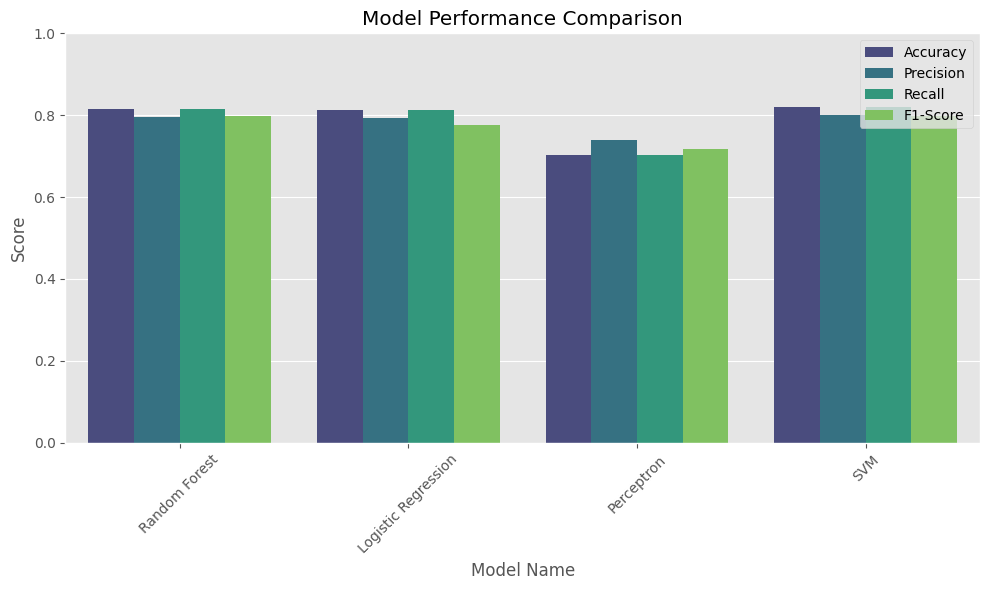

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_fitted_models(models, X_test, y_test):
    # Initialize an empty list to store evaluation results
    evaluation_results = []

    # Loop through each fitted model
    for model_name, model in models.items():
        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Append the results to the list
        evaluation_results.append({
            "Model Name": model_name,
            "Confusion Matrix": cm,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })

    # Convert the results to a DataFrame for better readability
    results_df = pd.DataFrame(evaluation_results)

    # Reshape data for plotting
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    results_melted = pd.melt(results_df, id_vars=["Model Name"], value_vars=metrics,
                             var_name="Metric", value_name="Score")

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_melted, x="Model Name", y="Score", hue="Metric", palette="viridis")
    plt.title("Model Performance Comparison")
    plt.ylim(0, 1)  # Assuming scores are between 0 and 1
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

    return results_df

models = {"Random Forest": rf_model, "Logistic Regression": log_model, "Perceptron": perceptron_model, "SVM": svm_model}

# Evaluate the fitted models and display the results
results = evaluate_fitted_models(models, X_test, y_test)